---
# Cairo University Faculty of Engineering
## Deep Learning 
## Assignment 2

---

Please write your full name here
- **Name** : Hussin Mohamed Saad ElRashidy
"

In [2]:
pip install d2l==1.0.0a1.post0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 121 kB 55.5 MB/s 
     |████████████████████████████████| 1.6 MB 48.2 MB/s 
     |████████████████████████████████| 82 kB 894 kB/s 


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from d2l import tensorflow as d2l
import pandas as pd
import math

from sklearn.datasets import make_blobs  #To generate artificial data
from keras.optimizers import SGD
from keras.utils import to_categorical

# Part 1 Computational Graphs


## Example
Suppose that we have a function of the form: $f(x,y) = \sigma(x) + (x-y)^2$

**SHOW YOUR WORK**

0. **Draw its computational graph with a minimum of 4 operations inside it. Name your intermediate variables and upload a picture of your graph**

- Your Answer:
    - ![Answer]()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. **Compute the forward path for this function. Use intermediate variables you identified in your graph**

- f --> final output
- Upload a a picture of your graph

- Your Answer:
    - ![Answer](https://files.catbox.moe/lz4vmf.jfif)


2. **Compute the backward path for this function to get:**
$$
\nabla f(x,y) = [ \frac{\partial f}{\partial y}, \frac{\partial f}{\partial x} ]
$$

- Upload a a picture of your graph
- **Use intermediate variables**
- **Write df/dy and df/dx**
- *Hint: Gradients add up at forks. This follows the multivariable chain rule in Calculus, which states that if a variable branches out to different parts, then the gradients that flow back to it will add.*

- Your Answer:
    - ![Answer](https://files.catbox.moe/dd1ood.jfif)

# Part 2: Regression

In this part, (**we will implement the entire linear regression method from scratch,
including the data pipeline, the model,
the loss function, and the minibatch stochastic gradient descent optimizer.**)
You will rely only on tensors and auto differentiation.


we will use $n$ to denote
the number of examples in our dataset.
We index the data examples by $i$, denoting each input
as $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$
and the corresponding label as $y^{(i)}$.


**Linear Model**

When our inputs consist of $d$ features,
we express our prediction $\hat{y}$ (in general the "hat" symbol denotes estimates) as

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$


We will often find it convenient
to refer to features of our entire dataset of $n$ examples
via the *design matrix* $\mathbf{X} \in \mathbb{R}^{n \times d}$.
Here, $\mathbf{X}$ contains one row for every example
and one column for every feature.

For a collection of features $\mathbf{X}$,
the predictions $\hat{\mathbf{y}} \in \mathbb{R}^n$
can be expressed via the matrix-vector product:

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b,$$


**Loss Function**

When our prediction for an example $i$ is $\hat{y}^{(i)}$
and the corresponding true label is $y^{(i)}$,
the squared error is given by:

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

To measure the quality of a model on the entire dataset of $n$ examples,
we simply average (or equivalently, sum)
the losses on the training set.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

When training the model, we want to find parameters ($\mathbf{w}^*, b^*$)
that minimize the total loss across all training examples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$


**Minibatch Stochastic Gradient Descent**

We can express the update mathematically as follows
($\partial$ denotes the partial derivative):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$


## Synthetic Data, Simple Model
### Generating the Dataset

To keep things simple, we will [**construct an artificial dataset
according to a linear model with additive noise.**]

In the following code snippet, we generate a dataset
containing 1000 examples, each consisting of 2 features
sampled from a standard normal distribution.
Thus our synthetic dataset will be a matrix
$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$.

(**The true parameters generating our dataset will be
$\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$,
and**) our synthetic labels will be assigned according
to the following linear model with the noise term $\epsilon$:

(**$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$**)

In [1]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [4]:
tf.random.set_seed(5)
true_w = tf.Variable([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-0.18030666 -0.95028627], shape=(2,), dtype=float32) 
label: tf.Tensor([7.0726256], shape=(1,), dtype=float32)


By generating a scatter plot using the second feature `features[:, 1]` and `labels`,
we can clearly observe the linear correlation between the two.


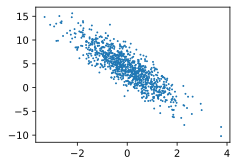

In [6]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

### Reading the Dataset

In the following code [**call upon the existing API in a framework to read data.**]
We pass in `features` and `labels` as arguments and specify `batch_size`
when instantiating a data iterator object.
Besides, the boolean value `is_train`
indicates whether or not
we want the data iterator object to shuffle the data
on each epoch (pass through the dataset).


1. **Use the tf function from_tensor_slices to generate a tf dataset object with batch_size as input**
2. **Use is_train flag to determine whether to shuffle the dataset or not**

In [7]:
def load_array(data_arrays, batch_size, is_train=True):  
    """Construct a TensorFlow data iterator."""
    #### YOUR CODE HERE ###
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    dataset = dataset.batch(batch_size)
    if is_train == True:
      dataset = dataset.shuffle(1100, reshuffle_each_iteration=True)

    return dataset

In [8]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

3. **Use `iter` to construct a Python iterator and use `next` to obtain the first item from the iterator.**


In [9]:
### YOUR CODE HERE ###
iterator = iter(data_iter)
print(next(iterator))



(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1.3564043e+00, -5.4133570e-01],
       [-1.0421329e+00,  2.0101453e-01],
       [-5.7323533e-01,  9.6179819e-01],
       [ 9.9003541e-01, -1.0166390e+00],
       [-2.7223310e-01, -4.9159122e-01],
       [-8.1928289e-01, -9.0086297e-04],
       [-2.0796096e+00,  8.4328723e-01],
       [ 3.0477965e-01,  2.0460723e-01],
       [ 1.1995399e+00,  2.9454825e+00],
       [-5.4580241e-01, -6.5089208e-01]], dtype=float32)>, <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 8.755783  ],
       [ 1.4219627 ],
       [-0.21046317],
       [ 9.629394  ],
       [ 5.3383512 ],
       [ 2.5792086 ],
       [-2.8150222 ],
       [ 4.1173363 ],
       [-3.4104102 ],
       [ 5.3102717 ]], dtype=float32)>)


4. **Explain what the output shape in the prvious tensors means:**


**Answer:**

they show the first batch (10 elements). first tensor is two features, second tensor is the label array which is one column

5. **How many TOTAL batches can be generated by **ENTIRE** data_iter ?** --> batches in data

**Answer:** 
100 batches can be generated 

data of size 1000, 
  batch size =10, 
  total batches = 100

### Initializing Model Parameters

6. **Initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01, and setting the bias to 0.**

Note: For the shapes of the weights and bias, look at the generating a dataset part


In [10]:
## YOUR CODE HERE ##
w = tf.Variable(tf.random.normal((2,1) , 0.0 , 0.01))
b =  tf.Variable(tf.zeros(1,1))


### Defining the Model

7. [**define our model, relating its inputs and parameters to its outputs.**]

In [11]:
def linreg(X, w, b):  
    """The linear regression model."""
    ## YOUR CODE HERE ##
    model = tf.matmul(X,w ) + b
    return model

### Defining the Loss Function

8. (**define the loss function**): the squared loss function
as described in Loss Function definition above.

Note: In the implementation, you need to transform the true value `y`
into the predicted value's shape `y_hat`.
The result returned by the following function
will also have the same shape as `y_hat`.


In [12]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    ## YOUR CODE HERE ##
    y_reshape = tf.reshape(y,(y_hat.shape))
    loss = (y_hat-y_reshape)**2
    return loss

### Defining the Optimization Algorithm

At each step, using one minibatch randomly drawn from our dataset,
we will estimate the gradient of the loss with respect to our parameters.
Next, we will update our parameters
in the direction that may reduce the loss.

9. **Filll in the missing function below to apply the minibatch stochastic gradient descent update, given a set of parameters, a learning rate, and a batch size.**

Note: use assign_sub


In [13]:
def sgd(params, grads, lr, batch_size):  
    """Minibatch stochastic gradient descent."""
    ## YOUR CODE HERE ##
    for param, grad in zip(params, grads):
       tf.compat.v1.assign_sub(param , lr*grad/batch_size)
    return params

### Training

10. **Implement the following loop**

* For each epoch :
    * Initialize parameters $(\mathbf{w}, b)$
    * Repeat until done
        * Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
        * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$
    * Print the loss at the end of each epoch

In each *epoch*,
we will iterate through the entire dataset
(using the `data_iter` function) once
passing through every example in the training dataset
.


Set the number of epochs `num_epochs` and the learning rate `lr` to 3 and 0.03, respectively.

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [15]:
## YOUR CODE HERE ##
# w = tf.Variable(w ,dtype=float)
# b= tf.Variable(b, dtype=float)
for epoch in range(num_epochs):
  for X,y in data_iter:
      with tf.GradientTape() as tape:
        tape.watch([w,b])
        ypred = net(X,w,b)
        loss_arr = loss(ypred , y)
      dw, db = tape.gradient(loss_arr , [w,b])
      w,b= sgd([w,b] , [dw , db] ,lr, batch_size)

  eloss = loss(net(features,w,b) , labels)
  print(f'epoch {epoch + 1}, loss {float(np.mean(eloss)):f}')
  print( w ,b )

epoch 1, loss 0.000384
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.9903506],
       [-3.3899794]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1896787], dtype=float32)>
epoch 2, loss 0.000107
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.001463 ],
       [-3.3994346]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1997848], dtype=float32)>
epoch 3, loss 0.000107
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.0009267],
       [-3.3990777]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199387], dtype=float32)>


In [16]:
print(w , b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.0009267],
       [-3.3990777]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199387], dtype=float32)>


In this case, because we synthesized the dataset ourselves,
we know precisely what the true parameters are.

11. [**evaluate our success in training by comparing the true parameters with those that we learned**] through our training loop. They should turn out to be very close to each other.


In [17]:
## YOUR CODE HERE ##
print(f'error in estimating w: {true_w-w}')
print(f'error in estimating b: {true_b-b}')

error in estimating w: [[-9.2673302e-04 -5.4009266e+00]
 [ 5.3990774e+00 -9.2244148e-04]]
error in estimating b: [0.00061274]


## Part 2  Diabetes Dataset

In this section, we will use SKLEARN's Diabetes dataset

### Loading the Dataset

1. **Load the Diabetes dataset from sklearn**

In [18]:
from sklearn.datasets import load_diabetes
## YOUR CODE HERE ##
# Load the diabetes dataset
dataset = load_diabetes()

2. **Look at the keys of diabetes_dataset dictionary**

In [19]:
## YOUR CODE HERE ##

### Look at keys to determine the data
print(dataset.keys())


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


3. **Use the key DESCR to understand the dataset**

In [20]:
## YOUR CODE HERE ##
print(dataset.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

4. **Save the data and target variables in numpy arrays and print their shapes**

In [21]:
### START CODE HERE ### (≈ 2 lines of code)
data = np.array(dataset.data)
targets = np.array(dataset.target)
### END CODE HERE ###

print ('The shape of data is: ' + str(data.shape))
print ('The shape of targets is: ' + str(targets.shape))
print ('I have f = %d features!' % (data.shape[1]))
print ('I have m = %d examples!' % (data.shape[0]))

The shape of data is: (442, 10)
The shape of targets is: (442,)
I have f = 10 features!
I have m = 442 examples!


In [ ]:
print(np.unique(targets).shape)

(214,)


5. **What are the ranges of each column in features and the target column?**

    - *Hint* you might find it helpful to convert to pandas dataframe and use ".describe"

In [22]:
### START CODE HERE ###
dataF = pd.DataFrame(dataset.data)
s = dataF.describe()
print(s)
### END CODE HERE ###

                  0             1             2             3             4  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                  5             6             7             8             9  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [23]:
dataff = pd.DataFrame(dataset.target)
s = dataff.describe()
print(s)

                0
count  442.000000
mean   152.133484
std     77.093005
min     25.000000
25%     87.000000
50%    140.500000
75%    211.500000
max    346.000000


### Preparing the data

6. **Split the data into train and test set using sklearn train_test_split.** Have the test set as 10% of data

In [24]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
### START CODE HERE ###
train_data, test_data ,train_targets , test_targets = train_test_split(data,targets,test_size = 0.1, random_state=20)
### END CODE HERE ###

print("Shape of training data is", train_data.shape)
print("Shape of training targets is", train_targets.shape)
print("Shape of test data is", test_data.shape)
print("Shape of test targets is", test_targets.shape)

Shape of training data is (397, 10)
Shape of training targets is (397,)
Shape of test data is (45, 10)
Shape of test targets is (45,)


- *feature-wise normalization*: for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in NumPy.
- **Question:** Shold we normalize features? WHY?
    - ANSWER: No we shouldn't , because they are already normalized around zero 

7. **normalize the targets using standard normalization**

Hint: Avoid leak between train and test data !!

In [25]:
# ### START CODE HERE ### (≈ 6 lines of code)
mean = np.mean(train_targets, axis =0)
std = np.std(train_targets , axis=0)
train_targets = (train_targets-mean)/std
test_targets = (test_targets-mean)/std
# ### END CODE HERE ###
print(train_data.shape)
print(train_targets.shape)

(397, 10)
(397,)


### Building your model

7. **Use tf.keras.Sequential to build a model with:**
    - 6 hidden layers each having 128 neurons and relu activation.
    - 1 output layer
    - use input_shape argument to specify input size in 1st layer
- **Question:** How many neurons should be in output layer? What should be the activation?
    - ANSWER: 1  , linear activation

In [26]:
def build_model(input_shape):
    ### START CODE HERE ### ()

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape = input_shape),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "linear")]
    )
    return model

In [27]:
# Print the model summary
input_shape=(train_data.shape[-1],)
model = build_model(input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

8. **Compile the model using optimizer=Adam, loss=mean squared loss, metrics=mean absoluute error:**

In [28]:
### START CODE HERE ### ()
model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=tf.keras.metrics.MeanAbsoluteError())


Note that we compile the model with the mse loss function—mean squared error, the
square of the difference between the predictions and the targets. We’re also monitoring a new metric during training: mean absolute error (MAE). It’s the
absolute value of the difference between the predictions and the targets.

9. **FIT the model using for 100 epochs, 64 batch size and a validation split of 0.15**

In [29]:
### START CODE HERE ### ()
history = model.fit(train_data , train_targets , batch_size = 64 , epochs =100 , validation_split=0.15)

Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 0.9797 - mean_absolute_error: 0.8472 - val_loss: 1.0231 - val_mean_absolute_error: 0.8745
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9012 - mean_absolute_error: 0.8140 - val_loss: 0.8721 - val_mean_absolute_error: 0.8098
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6958 - mean_absolute_error: 0.7111 - val_loss: 0.6652 - val_mean_absolute_error: 0.7026
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5171 - mean_absolute_error: 0.5819 - val_loss: 0.6362 - val_mean_absolute_error: 0.6700
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4485 - mean_absolute_error: 0.5228 - val_loss: 0.5514 - val_mean_absolute_error: 0.6431
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4948 - mean_absolute_error: 0.5825 - val_loss: 0.6821 - val_mean_absolute_error: 0.7076
Epoch 7/100
6/6 [================

In [30]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 1.0240 - mean_absolute_error: 0.7676 - 17ms/epoch - 9ms/step


[1.0240483283996582, 0.7676451206207275]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

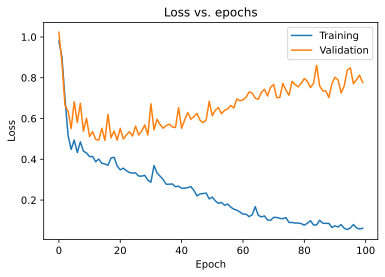

In [32]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

9. **Diagnose the learning curve:**
    - Why is the validation loss much higher than training loss?
    - What's this phenomenon called?
    - Mention 3 methods to reduce this.

- **answer**:
    - the model is too complex to generalize on new data
    - overfitting
    - reduce layers , dropout , reduce epochs

10. **Use one of the methods you mentioned and retrain the model then plot the learning curves**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 1s 30ms/step - loss: 0.9716 - mean_absolute_error: 0.8425 - val_loss: 1.0145 - val_mean_absolute_error: 0.8703
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9127 - mean_absolute_error: 0.8178 - val_loss: 0.9620 - val_mean_absolute_

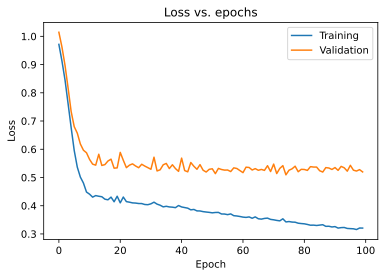

In [33]:
#### YOUR CODE HERE
def build_model(input_shape):
    ### START CODE HERE ### ()

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape = input_shape),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "linear")]
    )
    return model
# Print the model summary
input_shape=(train_data.shape[-1],)
model2 = build_model(input_shape)
print(model2.summary())
model2.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=tf.keras.metrics.MeanAbsoluteError())
history2 = model2.fit(train_data , train_targets , batch_size = 64 , epochs =100 , validation_split=0.15)
model2.evaluate(test_data, test_targets, verbose=2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Part 3 Batches and Epochs

In this part of the assignment we will create a synthetic data to play with. 
The data will have 2 features and 3 target classes --> multiclass classification problem

In [34]:
# prepare train and test dataset
def prepare_data():
    #  generate classification dataset with 3 centers (labels/classes)
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # plot data
    for class_value in range(3):
        # select indices of points with the class label
        row_ix = np.where(y == class_value)
        # scatter plot for points with a different color
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    # show plot
    plt.show()

    # one hot encode output variable to convert from integers to binary class
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    X_train, X_test = X[:n_train, :], X[n_train:, :]
    y_train, y_test = y[:n_train], y[n_train:]
    return X_train, y_train, X_test, y_test


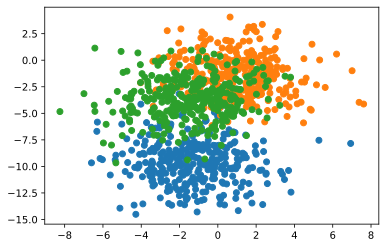

In [35]:
# prepare dataset
X_train, y_train, X_test, y_test = prepare_data()


- **Create a model with:**
    -  1 hidden dense layer (50 neurons), activation relu, , kernel_initializer he_uniform
    - 1 output layer
    - compile the model with SGD (learning rate 0.01 and momentum 0.9) optimizer and categorical crossentropy and accuracy inside build function

In [36]:
def build_model():
    
    ##### YOUR CODE HERE
    # define model
   model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = "relu" , kernel_initializer = 'he_uniform'),
        tf.keras.layers.Dense(3, activation = "softmax")])

    # compile model
   model.compile(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss = 'CategoricalCrossentropy' ,metrics = "accuracy" )
    
   return model

- Create a function to fit and build the model with different batch sizes

Use epochs = 125

In [37]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    ##### YOUR CODE HERE
    # build model
    model = build_model()
    # fit model
    history = model.fit(X_train , y_train , batch_size=n_batch,epochs=125, validation_data=(X_test,y_test))
    return history

### Hyperparameter Tuning

#### Batch size

##### Size =  1

10. **train for 1 batch size**

In [ ]:
### START CODE HERE ### 
batch_size =1
history = fit_model(X_train, y_train, X_test, y_test,batch_size)
###### END CODE HERE

Epoch 1/125
500/500 [==============================] - 2s 3ms/step - loss: 1.7597 - accuracy: 0.6300 - val_loss: 0.8504 - val_accuracy: 0.6400
Epoch 2/125
500/500 [==============================] - 1s 3ms/step - loss: 0.7741 - accuracy: 0.6940 - val_loss: 0.7402 - val_accuracy: 0.5820
Epoch 3/125
500/500 [==============================] - 1s 3ms/step - loss: 0.8710 - accuracy: 0.6360 - val_loss: 1.0191 - val_accuracy: 0.5300
Epoch 4/125
500/500 [==============================] - 1s 3ms/step - loss: 0.8193 - accuracy: 0.6120 - val_loss: 0.4932 - val_accuracy: 0.8280
Epoch 5/125
500/500 [==============================] - 1s 3ms/step - loss: 0.9023 - accuracy: 0.6020 - val_loss: 0.9600 - val_accuracy: 0.5640
Epoch 6/125
500/500 [==============================] - 1s 2ms/step - loss: 0.8179 - accuracy: 0.6240 - val_loss: 0.7748 - val_accuracy: 0.6600
Epoch 7/125
500/500 [==============================] - 1s 2ms/step - loss: 0.8689 - accuracy: 0.5840 - val_loss: 0.9437 - val_accuracy: 0.5440

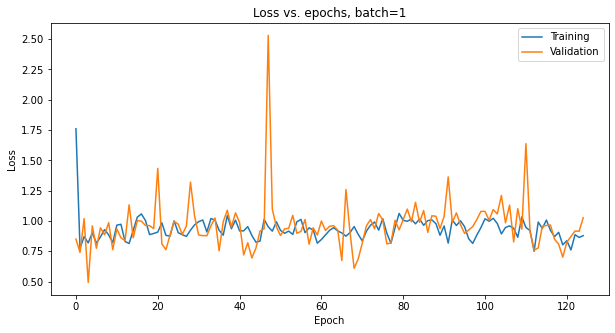

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

- **Diagnose this curve w.r.t learning rate**:
    - ANSWER: the validation curve is fluctuating which means too small learning rate
- Change learning rate to make this curve better

Epoch 1/125
500/500 [==============================] - 2s 3ms/step - loss: 1.7309 - accuracy: 0.5700 - val_loss: 1.1638 - val_accuracy: 0.6620
Epoch 2/125
500/500 [==============================] - 1s 3ms/step - loss: 0.9623 - accuracy: 0.6720 - val_loss: 0.6714 - val_accuracy: 0.7780
Epoch 3/125
500/500 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy: 0.7400 - val_loss: 0.5109 - val_accuracy: 0.8180
Epoch 4/125
500/500 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.7540 - val_loss: 0.4918 - val_accuracy: 0.8220
Epoch 5/125
500/500 [==============================] - 1s 3ms/step - loss: 0.5251 - accuracy: 0.7760 - val_loss: 0.4741 - val_accuracy: 0.8160
Epoch 6/125
500/500 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.7900 - val_loss: 0.5286 - val_accuracy: 0.7660
Epoch 7/125
500/500 [==============================] - 1s 3ms/step - loss: 0.4832 - accuracy: 0.7840 - val_loss: 0.4646 - val_accuracy: 0.8380

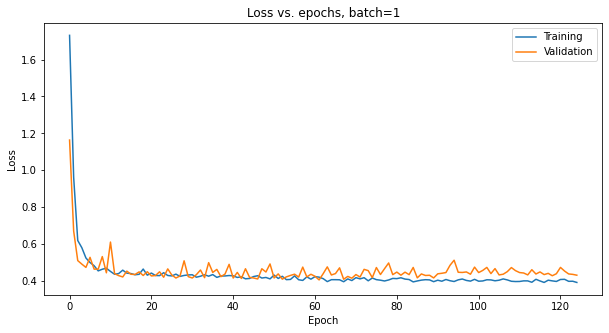

In [ ]:
### Your answer
def build_model():
    
    ##### YOUR CODE HERE
    # define model
   model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = "relu" , kernel_initializer = 'he_uniform'),
        tf.keras.layers.Dense(3, activation = "softmax")])

    # compile model
   model.compile(tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss = 'CategoricalCrossentropy' ,metrics = "accuracy" )
    
   return model
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    ##### YOUR CODE HERE
    # build model
    model = build_model()
    # fit model
    history = model.fit(X_train , y_train , batch_size=n_batch,epochs=125, validation_data=(X_test,y_test))
    return history
batch_size =1
history = fit_model(X_train, y_train, X_test, y_test,batch_size)
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Size =  16

In [ ]:
def build_model():
    
    ##### YOUR CODE HERE
    # define model
   model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = "relu" , kernel_initializer = 'he_uniform'),
        tf.keras.layers.Dense(3, activation = "softmax")])

    # compile model
   model.compile(tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss = 'CategoricalCrossentropy' ,metrics = "accuracy" )
    
   return model
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    ##### YOUR CODE HERE
    # build model
    model = build_model()
    # fit model
    history = model.fit(X_train , y_train , batch_size=n_batch,epochs=125, validation_data=(X_test,y_test))
    return history

10. **Retrain for 16 batch size**

In [ ]:
### START CODE HERE ### 
batch_size =16
history = fit_model(X_train, y_train, X_test, y_test,batch_size)
###### END CODE HERE

Epoch 1/125
32/32 [==============================] - 1s 8ms/step - loss: 1.6916 - accuracy: 0.4900 - val_loss: 0.7655 - val_accuracy: 0.6700
Epoch 2/125
32/32 [==============================] - 0s 4ms/step - loss: 0.8417 - accuracy: 0.6180 - val_loss: 0.8202 - val_accuracy: 0.6480
Epoch 3/125
32/32 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.6180 - val_loss: 0.6753 - val_accuracy: 0.6880
Epoch 4/125
32/32 [==============================] - 0s 4ms/step - loss: 0.7662 - accuracy: 0.6300 - val_loss: 0.6349 - val_accuracy: 0.7060
Epoch 5/125
32/32 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.6420 - val_loss: 0.6168 - val_accuracy: 0.7180
Epoch 6/125
32/32 [==============================] - 0s 3ms/step - loss: 0.7378 - accuracy: 0.6540 - val_loss: 0.7067 - val_accuracy: 0.7040
Epoch 7/125
32/32 [==============================] - 0s 4ms/step - loss: 0.7220 - accuracy: 0.6360 - val_loss: 0.6029 - val_accuracy: 0.7180
Epoch 8/125
3

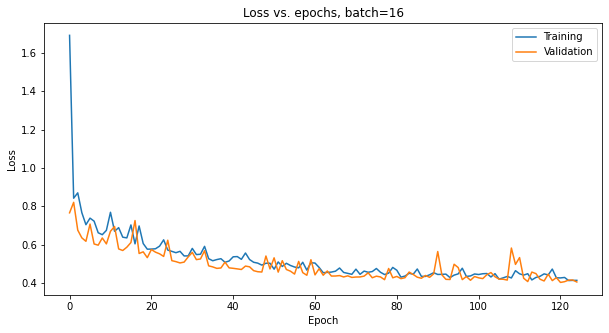

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Size =  128

10. **Retrain for 128 batch size**

In [ ]:
### START CODE HERE ### 
batch_size =128
history = fit_model(X_train, y_train, X_test, y_test,batch_size)
###### END CODE HERE

Epoch 1/125
4/4 [==============================] - 1s 58ms/step - loss: 1.4558 - accuracy: 0.4900 - val_loss: 0.9320 - val_accuracy: 0.6620
Epoch 2/125
4/4 [==============================] - 0s 10ms/step - loss: 1.0036 - accuracy: 0.5900 - val_loss: 1.1421 - val_accuracy: 0.5340
Epoch 3/125
4/4 [==============================] - 0s 10ms/step - loss: 1.1664 - accuracy: 0.5320 - val_loss: 1.0205 - val_accuracy: 0.6120
Epoch 4/125
4/4 [==============================] - 0s 15ms/step - loss: 0.9414 - accuracy: 0.5980 - val_loss: 0.8863 - val_accuracy: 0.6540
Epoch 5/125
4/4 [==============================] - 0s 10ms/step - loss: 0.9347 - accuracy: 0.5740 - val_loss: 0.9024 - val_accuracy: 0.6420
Epoch 6/125
4/4 [==============================] - 0s 11ms/step - loss: 0.8586 - accuracy: 0.6120 - val_loss: 0.8351 - val_accuracy: 0.6520
Epoch 7/125
4/4 [==============================] - 0s 9ms/step - loss: 0.8389 - accuracy: 0.6260 - val_loss: 0.8187 - val_accuracy: 0.6620
Epoch 8/125
4/4 [====

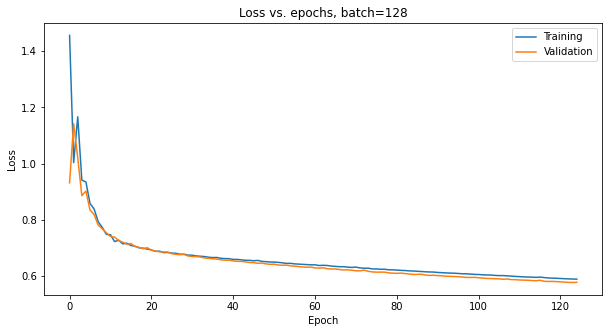

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Size =  Data

10. **Retrain for length of data batch size**

In [ ]:
### START CODE HERE ### 
batch_size =1000
history = fit_model(X_train, y_train, X_test, y_test,batch_size)
###### END CODE HERE

Epoch 1/125
1/1 [==============================] - 0s 482ms/step - loss: 1.8007 - accuracy: 0.3420 - val_loss: 1.8170 - val_accuracy: 0.3260
Epoch 2/125
1/1 [==============================] - 0s 28ms/step - loss: 1.7578 - accuracy: 0.3420 - val_loss: 1.7421 - val_accuracy: 0.3260
Epoch 3/125
1/1 [==============================] - 0s 28ms/step - loss: 1.6815 - accuracy: 0.3420 - val_loss: 1.6477 - val_accuracy: 0.3260
Epoch 4/125
1/1 [==============================] - 0s 33ms/step - loss: 1.5850 - accuracy: 0.3420 - val_loss: 1.5499 - val_accuracy: 0.3260
Epoch 5/125
1/1 [==============================] - 0s 26ms/step - loss: 1.4846 - accuracy: 0.3420 - val_loss: 1.4656 - val_accuracy: 0.2740
Epoch 6/125
1/1 [==============================] - 0s 27ms/step - loss: 1.3989 - accuracy: 0.3160 - val_loss: 1.4087 - val_accuracy: 0.3960
Epoch 7/125
1/1 [==============================] - 0s 28ms/step - loss: 1.3448 - accuracy: 0.3780 - val_loss: 1.3800 - val_accuracy: 0.3660
Epoch 8/125
1/1 [==

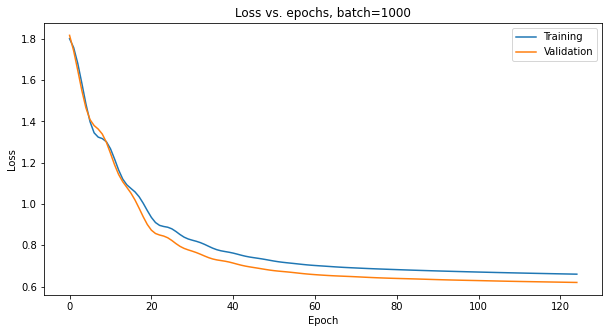

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

10. **What effect does changing batch size have on learning in terms of convergence and fluctuations?**

**Answer:**
the effect is less fluctuation but less convergence with the increase of batch size

#### Learning Rate

batch size 64

- **Use same code for build_model above, add an argument learning rate to change learning rate of optmizer**

In [ ]:
def build_model(lr):
    
    ##### YOUR CODE HERE
    # define model
    model = tf.keras.Sequential([
          tf.keras.layers.Dense(50, activation = "relu" , kernel_initializer = 'he_uniform'),
          tf.keras.layers.Dense(3, activation = "softmax")])

      # compile model
    model.compile(tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9), loss = 'CategoricalCrossentropy' ,metrics = "accuracy" )    
    # compile model  
    return model
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    ##### YOUR CODE HERE
    # build model
    model = build_model(lr)
    # fit model
    history = model.fit(X_train , y_train , batch_size=n_batch,epochs=125, validation_data=(X_test,y_test))
    return history

##### LR =  0.00001

10. **Retrain for 0.00001 LR**

In [ ]:
### START CODE HERE ### ()
# Print the model summary
model = build_model(0.00001)
history = model.fit(X_train, y_train, batch_size = 64 , epochs = 125 , validation_data = (X_test, y_test))
print(model.summary())


Epoch 1/125
8/8 [==============================] - 1s 24ms/step - loss: 9.2220 - accuracy: 0.3120 - val_loss: 8.4686 - val_accuracy: 0.3320
Epoch 2/125
8/8 [==============================] - 0s 7ms/step - loss: 8.6805 - accuracy: 0.3120 - val_loss: 7.7944 - val_accuracy: 0.3360
Epoch 3/125
8/8 [==============================] - 0s 8ms/step - loss: 7.8753 - accuracy: 0.3140 - val_loss: 6.9865 - val_accuracy: 0.3360
Epoch 4/125
8/8 [==============================] - 0s 7ms/step - loss: 6.9979 - accuracy: 0.3120 - val_loss: 6.1036 - val_accuracy: 0.3360
Epoch 5/125
8/8 [==============================] - 0s 5ms/step - loss: 6.0340 - accuracy: 0.3120 - val_loss: 5.2333 - val_accuracy: 0.3360
Epoch 6/125
8/8 [==============================] - 0s 6ms/step - loss: 5.1100 - accuracy: 0.3080 - val_loss: 4.3774 - val_accuracy: 0.3340
Epoch 7/125
8/8 [==============================] - 0s 5ms/step - loss: 4.2098 - accuracy: 0.2980 - val_loss: 3.5913 - val_accuracy: 0.3200
Epoch 8/125
8/8 [=========

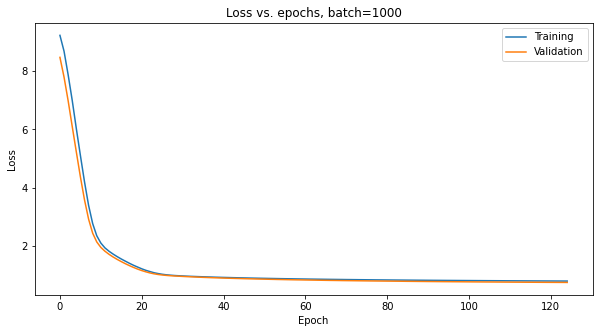

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### LR =  0.001

10. **Retrain for 0.001 LR**

In [ ]:
### START CODE HERE ### ()
model = build_model(0.001)
history = model.fit(X_train, y_train, batch_size = 64 , epochs = 125 , validation_data = (X_test, y_test))
print(model.summary())

Epoch 1/125
8/8 [==============================] - 1s 26ms/step - loss: 1.5224 - accuracy: 0.4440 - val_loss: 1.2879 - val_accuracy: 0.3980
Epoch 2/125
8/8 [==============================] - 0s 9ms/step - loss: 1.0005 - accuracy: 0.4700 - val_loss: 0.7726 - val_accuracy: 0.5480
Epoch 3/125
8/8 [==============================] - 0s 6ms/step - loss: 0.7871 - accuracy: 0.5760 - val_loss: 0.7268 - val_accuracy: 0.6580
Epoch 4/125
8/8 [==============================] - 0s 7ms/step - loss: 0.7855 - accuracy: 0.6120 - val_loss: 0.7174 - val_accuracy: 0.6860
Epoch 5/125
8/8 [==============================] - 0s 6ms/step - loss: 0.7627 - accuracy: 0.6200 - val_loss: 0.7020 - val_accuracy: 0.6940
Epoch 6/125
8/8 [==============================] - 0s 8ms/step - loss: 0.7387 - accuracy: 0.6280 - val_loss: 0.6865 - val_accuracy: 0.6440
Epoch 7/125
8/8 [==============================] - 0s 8ms/step - loss: 0.7224 - accuracy: 0.6220 - val_loss: 0.6770 - val_accuracy: 0.6660
Epoch 8/125
8/8 [=========

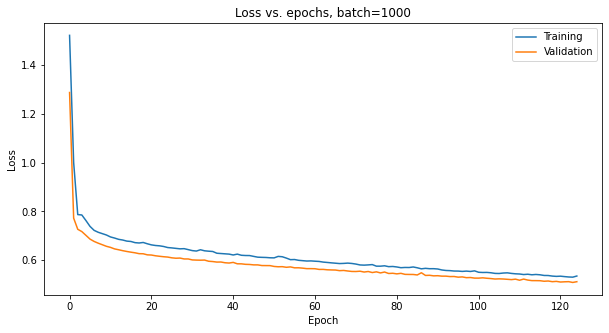

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### LR =  0.1

10. **Retrain for 0.1 LR**

In [ ]:
### START CODE HERE ### ()
model = build_model(0.1)
history = model.fit(X_train, y_train, batch_size = 64 , epochs = 125 , validation_data = (X_test, y_test))
print(model.summary())

Epoch 1/125
8/8 [==============================] - 1s 30ms/step - loss: 11.0988 - accuracy: 0.4000 - val_loss: 2.0170 - val_accuracy: 0.5360
Epoch 2/125
8/8 [==============================] - 0s 7ms/step - loss: 1.6121 - accuracy: 0.5520 - val_loss: 1.0984 - val_accuracy: 0.7840
Epoch 3/125
8/8 [==============================] - 0s 7ms/step - loss: 0.9207 - accuracy: 0.7040 - val_loss: 0.8466 - val_accuracy: 0.8240
Epoch 4/125
8/8 [==============================] - 0s 6ms/step - loss: 0.8243 - accuracy: 0.7500 - val_loss: 0.6411 - val_accuracy: 0.7820
Epoch 5/125
8/8 [==============================] - 0s 7ms/step - loss: 0.7617 - accuracy: 0.7240 - val_loss: 0.5891 - val_accuracy: 0.8080
Epoch 6/125
8/8 [==============================] - 0s 7ms/step - loss: 0.6124 - accuracy: 0.7980 - val_loss: 0.5276 - val_accuracy: 0.8180
Epoch 7/125
8/8 [==============================] - 0s 11ms/step - loss: 0.5795 - accuracy: 0.7940 - val_loss: 0.4860 - val_accuracy: 0.8220
Epoch 8/125
8/8 [=======

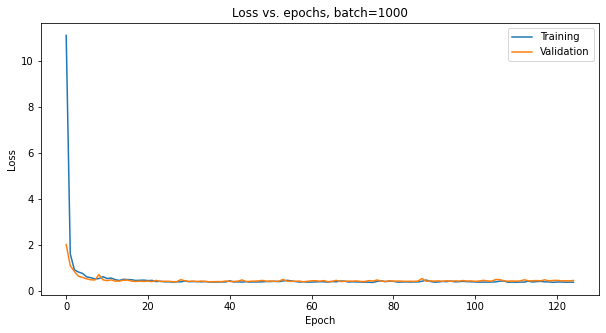

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

10. **What effect does changing learning rate have on learning?**

**Answer:**
increasing learning rate increase convergence and reduce loss highly